In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
df = pd.read_csv("C:/Users/joon2/fifa.csv", engine = "python")

In [5]:
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1900-02-03,Scotland,Wales,5,2,British Championship,Aberdeen,Scotland,False
1,1900-02-24,Wales,Northern Ireland,2,0,British Championship,Llandudno,Wales,False
2,1900-03-03,Northern Ireland,Scotland,0,3,British Championship,Belfast,Ireland,False
3,1900-03-17,Northern Ireland,England,0,2,British Championship,Dublin,Ireland,False
4,1900-03-26,Wales,England,1,1,British Championship,Cardiff,Wales,False
5,1900-04-07,Scotland,England,4,1,British Championship,Glasgow,Scotland,False
6,1901-02-23,Scotland,Northern Ireland,11,0,British Championship,Glasgow,Scotland,False
7,1901-03-02,Wales,Scotland,1,1,British Championship,Wrexham,Wales,False
8,1901-03-09,England,Northern Ireland,3,0,British Championship,Southampton,England,False
9,1901-03-18,England,Wales,6,0,British Championship,Newcastle,England,False


In [7]:
df_date_split = df["date"].str.split("-", n = 1, expand = True)

In [9]:
df_date_split.head()

,0,1
0,1900,02-03
1,1900,02-24
2,1900,03-03
3,1900,03-17
4,1900,03-26


In [10]:
df["date"] = df_date_split

In [11]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1900,Scotland,Wales,5,2,British Championship,Aberdeen,Scotland,False
1,1900,Wales,Northern Ireland,2,0,British Championship,Llandudno,Wales,False
2,1900,Northern Ireland,Scotland,0,3,British Championship,Belfast,Ireland,False
3,1900,Northern Ireland,England,0,2,British Championship,Dublin,Ireland,False
4,1900,Wales,England,1,1,British Championship,Cardiff,Wales,False


In [13]:
df.shape #(instances, attributes)

(39514, 9)

In [14]:
port_size = df.pivot_table(index="home_team", columns="away_team", aggfunc="size")
port_size.head()

away_team,Abkhazia,Afghanistan,Albania,Alderney,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Western Armenia,Western Australia,Western Isles,Western Sahara,Yemen,Yemen DPR,Yugoslavia,Zambia,Zanzibar,Zimbabwe
home_team,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
Alderney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,7.0,NaN,4.0


In [15]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [16]:
df['date'] = df['date'].astype('int')

In [17]:
df.dtypes

date           int32
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

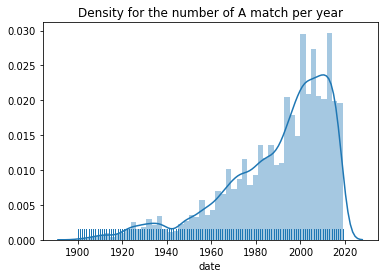

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['date'], kde=True, rug=True)
plt.title("Density for the number of A match per year")
plt.show()

In [95]:
df1900 = df.loc[(df["date"] >= 1900) & (df["date"] < 1920)]

In [96]:
df1900.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1900,Scotland,Wales,5,2,British Championship,Aberdeen,Scotland,False
1,1900,Wales,Northern Ireland,2,0,British Championship,Llandudno,Wales,False
2,1900,Northern Ireland,Scotland,0,3,British Championship,Belfast,Ireland,False
3,1900,Northern Ireland,England,0,2,British Championship,Dublin,Ireland,False
4,1900,Wales,England,1,1,British Championship,Cardiff,Wales,False


In [97]:
df1900_index_date = df1900.set_index("date")

- set_index 명령으로 date열을 인덱스로 설정할 수 있다. 이 때 기존 인덱스는 없어진다.

In [98]:
df1900_index_date.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1900,Scotland,Wales,5,2,British Championship,Aberdeen,Scotland,False
1900,Wales,Northern Ireland,2,0,British Championship,Llandudno,Wales,False
1900,Northern Ireland,Scotland,0,3,British Championship,Belfast,Ireland,False
1900,Northern Ireland,England,0,2,British Championship,Dublin,Ireland,False
1900,Wales,England,1,1,British Championship,Cardiff,Wales,False


In [99]:
df1900_index_date_reset = df1900_index_date.reset_index()

- reset_index 명령으로 인덱스를 보통의 자료열로 바꿀 수도 있다. 이 때 인덱스 열은 자료열의 가장 선두로 삽입된다. 
- 데이터프레임의 인덱스는 정수로 된 디폴트 인덱스로 바뀐다.

In [109]:
df1900_index_date_reset.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1900,Scotland,Wales,5,2,British Championship,Aberdeen,Scotland,False
1,1900,Wales,Northern Ireland,2,0,British Championship,Llandudno,Wales,False
2,1900,Northern Ireland,Scotland,0,3,British Championship,Belfast,Ireland,False
3,1900,Northern Ireland,England,0,2,British Championship,Dublin,Ireland,False
4,1900,Wales,England,1,1,British Championship,Cardiff,Wales,False


In [110]:
df1900_index_date_reset_drop = df1900_index_date_reset.reset_index(drop = True)

- reset_index 명령 사용시에 drop=True 로 설정하면 인덱스 열을 보통의 자료열로 올리는 것이 아니라 그냥 버리게 된다.

In [111]:
df1900_index_date_reset_drop.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1900,Scotland,Wales,5,2,British Championship,Aberdeen,Scotland,False
1,1900,Wales,Northern Ireland,2,0,British Championship,Llandudno,Wales,False
2,1900,Northern Ireland,Scotland,0,3,British Championship,Belfast,Ireland,False
3,1900,Northern Ireland,England,0,2,British Championship,Dublin,Ireland,False
4,1900,Wales,England,1,1,British Championship,Cardiff,Wales,False


In [112]:
df1900.shape

(390, 9)

In [113]:
df1920 = df.loc[(df["date"] >= 1920) & (df["date"] <= 1939)].reset_index()

In [114]:
df1920.head()

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,390,1920,Italy,France,9,4,Friendly,Milan,Italy,False
1,391,1920,Northern Ireland,Wales,2,2,British Championship,Belfast,Ireland,False
2,392,1920,Wales,Scotland,1,1,British Championship,Cardiff,Wales,False
3,393,1920,Switzerland,France,0,2,Friendly,Geneva,Switzerland,False
4,394,1920,Scotland,Northern Ireland,3,0,British Championship,Glasgow,Scotland,False


In [115]:
df1920_drop = df.loc[(df["date"] >= 1920) & (df["date"] <= 1939)].reset_index(drop = True)

In [116]:
df1920_drop.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1920,Italy,France,9,4,Friendly,Milan,Italy,False
1,1920,Northern Ireland,Wales,2,2,British Championship,Belfast,Ireland,False
2,1920,Wales,Scotland,1,1,British Championship,Cardiff,Wales,False
3,1920,Switzerland,France,0,2,Friendly,Geneva,Switzerland,False
4,1920,Scotland,Northern Ireland,3,0,British Championship,Glasgow,Scotland,False


In [126]:
a = df1920_drop[1 : 5]
a

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1,1920,Northern Ireland,Wales,2,2,British Championship,Belfast,Ireland,False
2,1920,Wales,Scotland,1,1,British Championship,Cardiff,Wales,False
3,1920,Switzerland,France,0,2,Friendly,Geneva,Switzerland,False
4,1920,Scotland,Northern Ireland,3,0,British Championship,Glasgow,Scotland,False


In [128]:
b = df1920_drop["city"]
b[0 : 5]

0      Milan
1    Belfast
2    Cardiff
3     Geneva
4    Glasgow
Name: city, dtype: object

In [129]:
c = df1920_drop.loc[(1, 5), ("date", "away_score")]
c

,date,away_score
1,1920,2
5,1920,2


In [133]:
d = df1920_drop.loc[1 : 5, "date" : "away_score"]
d

,date,home_team,away_team,home_score,away_score
1,1920,Northern Ireland,Wales,2,2
2,1920,Wales,Scotland,1,1
3,1920,Switzerland,France,0,2
4,1920,Scotland,Northern Ireland,3,0
5,1920,England,Wales,1,2


In [134]:
e = df1920_drop.loc[1 : 5, "date" :]
e

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1,1920,Northern Ireland,Wales,2,2,British Championship,Belfast,Ireland,False
2,1920,Wales,Scotland,1,1,British Championship,Cardiff,Wales,False
3,1920,Switzerland,France,0,2,Friendly,Geneva,Switzerland,False
4,1920,Scotland,Northern Ireland,3,0,British Championship,Glasgow,Scotland,False
5,1920,England,Wales,1,2,British Championship,London,England,False


In [135]:
f = df1920_drop.loc[1 : 5, "tournament" :]
f

,tournament,city,country,neutral
1,British Championship,Belfast,Ireland,False
2,British Championship,Cardiff,Wales,False
3,Friendly,Geneva,Switzerland,False
4,British Championship,Glasgow,Scotland,False
5,British Championship,London,England,False


In [136]:
g = df1920_drop.loc[1 : 5, :]
g

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1,1920,Northern Ireland,Wales,2,2,British Championship,Belfast,Ireland,False
2,1920,Wales,Scotland,1,1,British Championship,Cardiff,Wales,False
3,1920,Switzerland,France,0,2,Friendly,Geneva,Switzerland,False
4,1920,Scotland,Northern Ireland,3,0,British Championship,Glasgow,Scotland,False
5,1920,England,Wales,1,2,British Championship,London,England,False


In [139]:
h = df1920_drop.loc[1 : 5]
h

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1,1920,Northern Ireland,Wales,2,2,British Championship,Belfast,Ireland,False
2,1920,Wales,Scotland,1,1,British Championship,Cardiff,Wales,False
3,1920,Switzerland,France,0,2,Friendly,Geneva,Switzerland,False
4,1920,Scotland,Northern Ireland,3,0,British Championship,Glasgow,Scotland,False
5,1920,England,Wales,1,2,British Championship,London,England,False


In [142]:
i = df1920_drop.loc[:, :]
i.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1920,Italy,France,9,4,Friendly,Milan,Italy,False
1,1920,Northern Ireland,Wales,2,2,British Championship,Belfast,Ireland,False
2,1920,Wales,Scotland,1,1,British Championship,Cardiff,Wales,False
3,1920,Switzerland,France,0,2,Friendly,Geneva,Switzerland,False
4,1920,Scotland,Northern Ireland,3,0,British Championship,Glasgow,Scotland,False
